In this notebook we use Python to draw [colorpleth maps](https://en.wikipedia.org/wiki/Choropleth_map) that report risk to assets, capacity, and resulting risk to welfare on a simpliied map of the Philippines.


## Get the Data

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
#The main library we use. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd

In [43]:
df_with_results = pd.read_csv("results/all_data_and_results.csv", index_col=0, skiprows=[0,2])
df_with_results.head()

,pop,cp,cr,pov_head,gdp_pc_pp,gdp_pc_pp_nat,social_p,social_r,v_p,v_r,...,dK,delta_W,dcap,dcar,dKtot,dWpc_curency,dWtot_currency,risk,resilience,risk_to_assets
variable,,,,,,,,,,,,,,,,,,,,,
Ha Noi,6698811,601.835765,5268.983750,0.059952,4989.178711,3692.174852,0.132861,0.132861,0.033333,0.033333,...,223.782876,0.000010,56.827762,494.235505,1.915541e+08,38.347225,2.568808e+08,0.007686,0.745692,0.005731
Ha Giang,774681,245.646228,5193.757053,0.638095,2036.390991,3692.174852,0.108244,0.108244,0.072512,0.033333,...,32.944633,0.000022,50.644214,495.329291,3.858832e+06,27.687183,2.144873e+07,0.013596,0.179910,0.002446
Cao Bang,540048,247.407868,4246.666248,0.549020,2050.994873,3692.174852,0.130566,0.130566,0.047619,0.033333,...,38.711005,0.000016,31.933323,384.958195,2.740239e+06,17.695338,9.556332e+06,0.008628,0.286746,0.002474
Bac Kan,311681,267.005596,6671.464083,0.696078,2213.458740,3692.174852,0.065313,0.065313,0.036150,0.033333,...,32.310035,0.000013,27.774917,638.061457,1.286810e+06,15.520882,4.837564e+06,0.007012,0.266004,0.001865
Tuyen Quang,772231,307.017677,4314.007739,0.441441,2545.156250,3692.174852,0.074788,0.074788,0.111589,0.033333,...,64.893633,0.000031,97.402516,413.406919,6.893959e+06,49.337004,3.809956e+07,0.019385,0.180946,0.003508


## Map the data

The following library, coded for this project, allows to plot maps. It produces [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps, that can be visualized in a browser, out of the box. 

It can also automatically transform those SVG maps into [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics) maps, but for that it requires that the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. 
Finally, to automatically merge the map and the legend in a single file, it requires [ImageMagick](http://www.imagemagick.org/script/index.php).

In [44]:
#this library contains ad hoc functions, coded for this project, that allow to produce maps 
from maps_lib import * 

In [45]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: 
#this controls the font used in the legend
font = {'family' : 'sans serif',
    'size'   : 22}
plt.rc('font', **font)

The [blank map of the Philippines](map/PHL_adm1.svg) we use here is an SVG.
(It was built starting from a [shapefile](https://en.wikipedia.org/wiki/Shapefile) from [GADM.org](http://gadm.org), that was simplified with  [mapshaper.org](http://mapshaper.org) then converted to SVG with [Kartograph](http://kartograph.org/))

In [46]:
# path to the blank map 
svg_file_path = "inputs/BlankSimpleMapVN.svg"

#### First block: risk to assets 

In [47]:
df_with_results.risk_to_assets.replace(np.inf,np.nan, inplace=True)

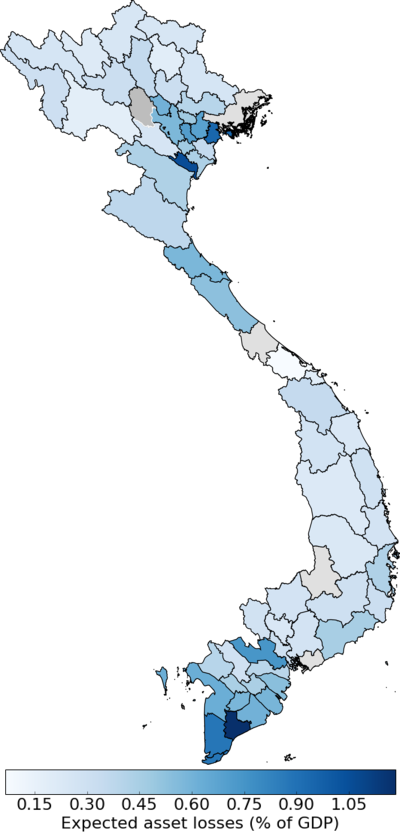

In [48]:
make_map_from_svg(
        df_with_results.risk_to_assets, #data 
        svg_file_path,                  #path to blank map
        outname="asset_risk",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
        color_maper=plt.cm.get_cmap("Blues"), #color scheme (from matpl*otlib. Chose them from http://colorbrewer2.org/)
        label="Expected asset losses (% of GDP)",
        new_title="Map of asset risk in Vietnam",  #title for the colored SVG
)

#### Second block: socio-economic capacity 

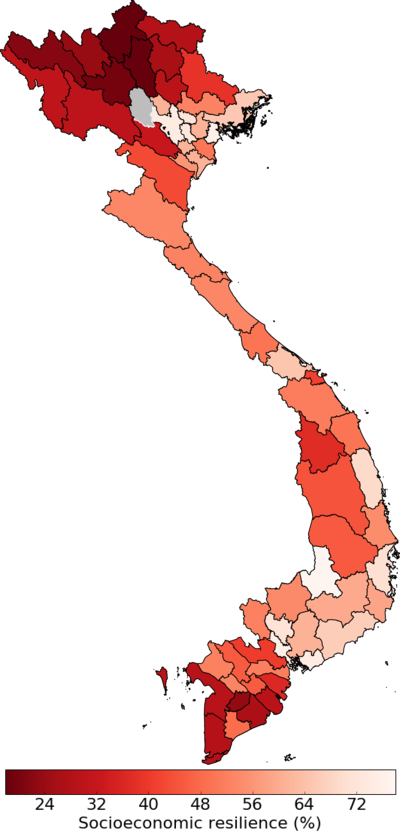

In [49]:
make_map_from_svg(
        df_with_results.resilience, 
        svg_file_path,
        outname="se_capacity", 
        color_maper=plt.cm.get_cmap("Reds_r"), 
        label="Socioeconomic resilience (%)",
        new_title="Map of socio-economic resilience in VN")

#### Total risk to welfare ($\frac {\text{asset risk}} {\text{socio-economic capacity}}$)

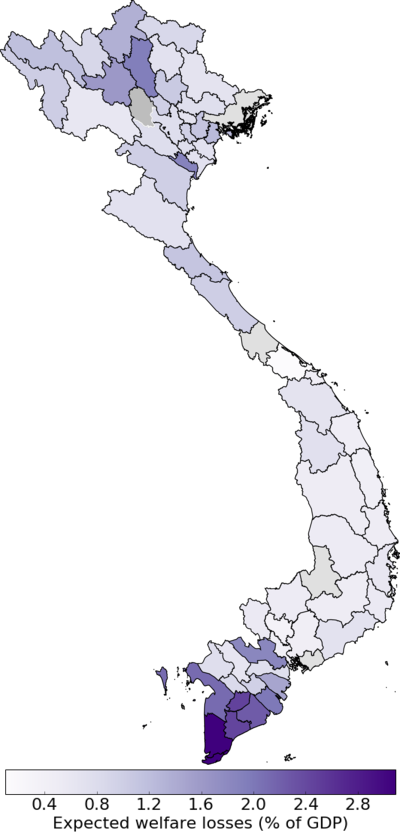

In [50]:
make_map_from_svg(
        1*df_with_results.risk.replace(np.inf,np.nan), 
        svg_file_path,
        outname="welfare_risk", 
        color_maper=plt.cm.get_cmap("Purples"), 
        label="Expected welfare losses (% of GDP)",
        new_title="Map of welfare risk in VN")